In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from fredapi import Fred

In [3]:
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

# Get the FRED API key from the environment
fred_key = os.getenv('fred_key')

## 1. Create the Fred object

In [5]:
fred = Fred(api_key=fred_key)

## 2. Search and load for economic data from FRED

In [9]:
fred.search('SP', order_by='popularity').head()

id realtime_start realtime_end  \
series id                                            
CSUSHPINSA  CSUSHPINSA     2024-09-26   2024-09-26   
SP500            SP500     2024-09-26   2024-09-26   
CSUSHPISA    CSUSHPISA     2024-09-26   2024-09-26   
DJIA              DJIA     2024-09-26   2024-09-26   
SPCS20RSA    SPCS20RSA     2024-09-26   2024-09-26   

                                                        title  \
series id                                                       
CSUSHPINSA  S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                 S&P 500   
CSUSHPISA   S&P CoreLogic Case-Shiller U.S. National Home ...   
DJIA                             Dow Jones Industrial Average   
SPCS20RSA   S&P CoreLogic Case-Shiller 20-City Composite H...   

           observation_start observation_end     frequency frequency_short  \
series id                                                                    
CSUSHPINSA        1987-01-01      2024-07-01       Monthly               M   
SP500             2014-09-26      2024-09-25  Daily, Close               D   
CSUSHPISA         1987-01-01      2024-07-01       Monthly               M   
DJIA              2014-09-26      2024-09-25  Daily, Close               D   
SPCS20RSA         2000-01-01      2024-07-01       Monthly               M   

                         units         units_short      seasonal_adjustment  \
series id                                                                     
CSUSHPINSA  Index Jan 2000=100  Index Jan 2000=100  Not Seasonally Adjusted   
SP500                    Index               Index  Not Seasonally Adjusted   
CSUSHPISA   Index Jan 2000=100  Index Jan 2000=100      Seasonally Adjusted   
DJIA                     Index               Index  Not Seasonally Adjusted   
SPCS20RSA   Index Jan 2000=100  Index Jan 2000=100      Seasonally Adjusted   

           seasonal_adjustment_short               last_updated popularity  \
series id                                                                    
CSUSHPINSA                       NSA  2024-09-25 10:50:02-05:00         88   
SP500                            NSA  2024-09-25 19:10:59-05:00         83   
CSUSHPISA                         SA  2024-09-25 10:50:04-05:00         78   
DJIA                             NSA  2024-09-25 19:12:30-05:00         74   
SPCS20RSA                         SA  2024-09-25 10:55:01-05:00         67   

                                                        notes  
series id                                                      
CSUSHPINSA  For more information regarding the index, plea...  
SP500       The observations for the S&P 500 represent the...  
CSUSHPISA   For more information regarding the index, plea...  
DJIA        The observations for the Dow Jones Industrial ...  
SPCS20RSA   For more information regarding the index, plea...

In [6]:
df_SP = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

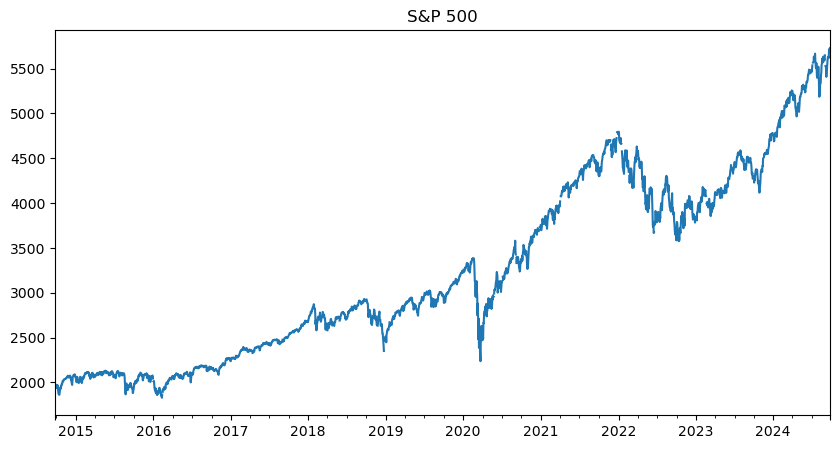

In [5]:
df_SP.plot(figsize=(10,5), title='S&P 500', lw=1.5)

## 3. Load and Join mutiple data series

In [ ]:
unemployment_result = fred.search('Unemployment')
unemployment_result

<Axes: >

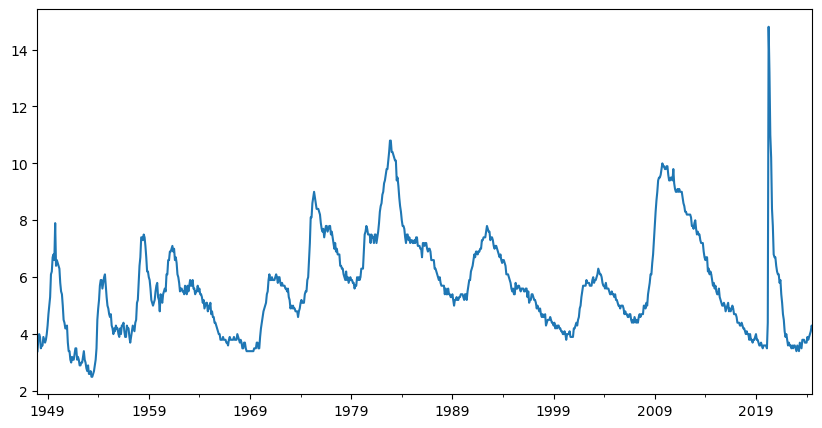

In [6]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(10,5))

In [7]:
# Load data of state's unemployment rate
unemployment_df=fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
# Filter only titles containing 'Unemployment Rate'

unemployment_df = unemployment_df.loc[unemployment_df.title.str.contains('Unemployment Rate')]
unemployment_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-09-26   2024-09-26   
LNS14000006            LNS14000006     2024-09-26   2024-09-26   
CAUR                          CAUR     2024-09-26   2024-09-26   
TXUR                          TXUR     2024-09-26   2024-09-26   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-09-26   2024-09-26   
...                            ...            ...          ...   
LNS14000026            LNS14000026     2024-09-26   2024-09-26   
LNS14000048            LNS14000048     2024-09-26   2024-09-26   
LNS14000089            LNS14000089     2024-09-26   2024-09-26   
M08311USM156SNBR  M08311USM156SNBR     2024-09-26   2024-09-26   
LNS14000150            LNS14000150     2024-09-26   2024-09-26   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
CAUR                                Unemployment Rate in California   
TXUR                                     Unemployment Rate in Texas   
M0892AUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
LNS14000026               Unemployment Rate - 20 Yrs. & over, Women   
LNS14000048                      Unemployment Rate - 25 Yrs. & over   
LNS14000089                          Unemployment Rate - 25-34 Yrs.   
M08311USM156SNBR  Unemployment Rate, Married Males, Spouse Prese...   
LNS14000150                         Unemployment Rate - Married Men   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-08-01   Monthly               M   
LNS14000006             1972-01-01      2024-08-01   Monthly               M   
CAUR                    1976-01-01      2024-08-01   Monthly               M   
TXUR                    1976-01-01      2024-08-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
...                            ...             ...       ...             ...   
LNS14000026             1948-01-01      2024-08-01   Monthly               M   
LNS14000048             1948-01-01      2024-08-01   Monthly               M   
LNS14000089             1948-01-01      2024-08-01   Monthly               M   
M08311USM156SNBR        1954-11-01      1968-01-01   Monthly               M   
LNS14000150             1955-01-01      2024-08-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
LNS14000026       Percent           %  Seasonally Adjusted   
LNS14000048       Percent           %  Seasonally Adjusted   
LNS14000089       Percent           %  Seasonally Adjusted   
M08311USM156SNBR  Percent           %  Seasonally Adjusted   
LNS14000150       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-09-06 07:46:02-05:00   
LNS14000006                             SA  2024-09-06 07:46:16-05:00   
CAUR                                    SA  2024-09-23 09:48:02-05:00   
TXUR                                

In [8]:
unemployment_df.index

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [8]:
# Filter ids that don't contain data about states (ids start with LNS and M08)
filtered_ids = [id for id in unemployment_df.index if 'LNS' not in id and 'M08' not in id and 'LASMT' not in id and 'LR' not in id]

In [9]:
# Create a loop to pull all the files for each ID
combined_file =[]

for id in filtered_ids:
    results = fred.get_series(series_id=id)
    results = results.to_frame(name=id)
    combined_file.append(results)

unemp_state = pd.concat(combined_file,axis=1)

In [10]:
unemp_state= unemp_state.drop('UNRATE', axis=1) #'UNRATE'don't have data about state unemployment

In [189]:
unemp_state

CAUR  TXUR  NYUR  U2RATE  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  ...  \
1948-01-01   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1948-02-01   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1948-03-01   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1948-04-01   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1948-05-01   NaN   NaN   NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...     ...   ...   ...   ...   ...   ...   ...  ...   
2024-04-01   5.3   4.0   4.2     1.9   3.3   3.4   4.0   3.9   3.1   2.9  ...   
2024-05-01   5.2   4.0   4.2     1.9   3.3   3.4   4.2   3.9   3.0   3.0  ...   
2024-06-01   5.2   4.0   4.2     1.9   3.3   3.4   4.4   4.1   2.9   3.2  ...   
2024-07-01   5.2   4.1   4.3     2.1   3.3   3.4   4.5   4.4   2.8   3.5  ...   
2024-08-01   5.3   4.1   4.4     2.0   3.3   3.4   4.5   4.5   2.8   3.7  ...   

            KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  CNERUR  CWSTUR  \
1948-01-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1948-02-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1948-03-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1948-04-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
1948-05-01   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN     NaN   
...          ...   ...   ...   ...   ...     ...     ...     ...     ...   
2024-04-01   2.8   2.8   3.9   2.1   2.0     3.6     3.5     3.9     4.6   
2024-05-01   2.9   2.9   3.9   2.1   2.0     3.7     3.5     3.9     4.6   
2024-06-01   3.0   2.9   4.0   2.1   2.0     3.8     3.5     3.8     4.5   
2024-07-01   3.2   2.9   4.1   2.1   2.0     4.0     3.6     3.9     4.6   
2024-08-01   3.3   3.0   4.2   2.2   2.0     4.1     3.6     4.0     4.6   

            CNEWUR  
1948-01-01     NaN  
1948-02-01     NaN  
1948-03-01     NaN  
1948-04-01     NaN  
1948-05-01     NaN  
...            ...  
2024-04-01     3.3  
2024-05-01     3.4  
2024-06-01     3.3  
2024-07-01     3.4  
2024-08-01     3.5  

[920 rows x 58 columns]

<Axes: >

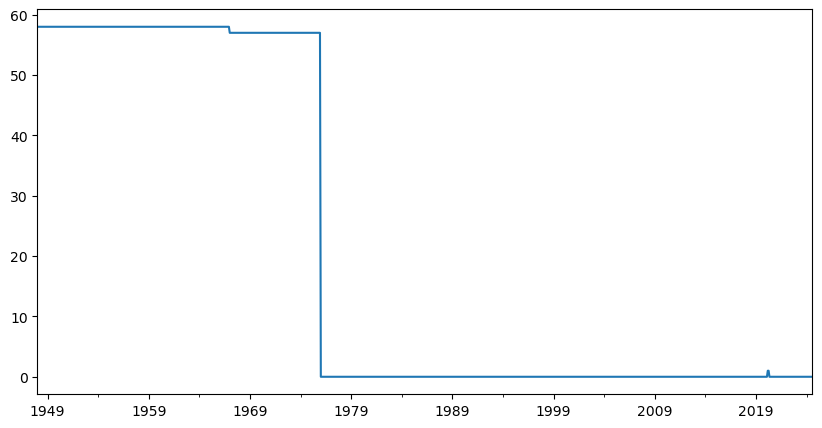

In [13]:
unemp_state.isna().sum(axis=1).plot(figsize=(10,5)) # to show how many NaN values for each day

In [11]:
# it shows that before 1980 there are many missing values => drop data before 1976
# Opt1: unemp_state = unemp_state[unemp_state.index >= '1976-01-01']
# Opt2: unemp_state = unemp_state[unemp_state.index >= pd.Timestamp('1976-01-01')]
# or:
unemp_state = unemp_state.loc['1976-01-01':]

In [15]:
#Plotting Unemployment rate in state and in region

px.line(unemp_state)

The plot shows that Apr 2020 had the highest rate of unemployment

### Pull data in Apr 2020 (peak)

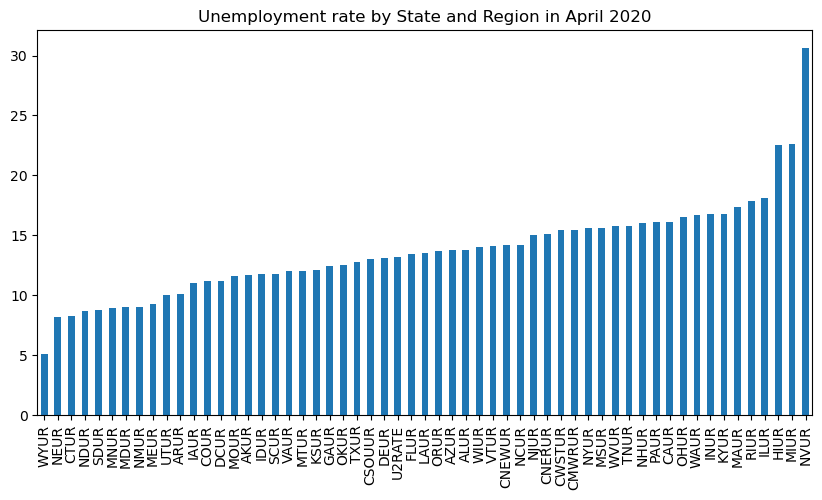

In [16]:
unemp_state.loc['2020-04-01':'2020-04-30'].T \
    .sort_values('2020-04-01')\
    .dropna() \
    .plot(kind='bar', figsize=(10,5), title='Unemployment rate by State and Region in April 2020')
plt.legend().remove()
plt.show()

In [194]:
unemployment_df.head()

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2024-09-26   2024-09-26   
LNS14000006            LNS14000006     2024-09-26   2024-09-26   
CAUR                          CAUR     2024-09-26   2024-09-26   
TXUR                          TXUR     2024-09-26   2024-09-26   
M0892AUSM156SNBR  M0892AUSM156SNBR     2024-09-26   2024-09-26   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
CAUR                            Unemployment Rate in California   
TXUR                                 Unemployment Rate in Texas   
M0892AUSM156SNBR            Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2024-08-01   Monthly               M   
LNS14000006             1972-01-01      2024-08-01   Monthly               M   
CAUR                    1976-01-01      2024-08-01   Monthly               M   
TXUR                    1976-01-01      2024-08-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
TXUR              Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2024-09-06 07:46:02-05:00   
LNS14000006                             SA  2024-09-06 07:46:16-05:00   
CAUR                                    SA  2024-09-23 09:48:02-05:00   
TXUR                                    SA  2024-09-23 09:48:03-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   95  The unemployment rate represents the number of...  
LNS14000006              72  The series comes from the 'Current Population ...  
CAUR                     64                                               None  
TXUR                     56                                               None  
M0892AUSM156SNBR         54  Series Is Presented Here As Three Variables--(...

In [12]:
# Transform the ID to state name
id_to_state = unemployment_df['title'].str.replace('Unemployment Rate in ','').to_dict()

In [196]:
unemp_state.columns

Index(['CAUR', 'TXUR', 'NYUR', 'U2RATE', 'FLUR', 'PAUR', 'OHUR', 'MIUR',
       'ALUR', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR',
       'VAUR', 'KYUR', 'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR',
       'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR',
       'INUR', 'LAUR', 'HIUR', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR', 'NEUR',
       'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR', 'WYUR', 'DEUR', 'VTUR', 'SDUR',
       'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR', 'CNEWUR'],
      dtype='object')

In [13]:
unemp_state.columns = [id_to_state[x] for x in unemp_state.columns] # create a list of state name using list comprehension
unemp_state.columns

Index(['California', 'Texas', 'New York',
       'Unemployment Rate - Job Losers (U-2)', 'Florida', 'Pennsylvania',
       'Ohio', 'Michigan', 'Alabama', 'Massachusetts', 'North Carolina',
       'Illinois', 'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin',
       'Virginia', 'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota',
       'Tennessee', 'Washington', 'Maryland', 'Oregon', 'West Virginia',
       'Nevada', 'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'the District of Columbia', 'Mississippi', 'Maine',
       'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island',
       'Kansas', 'Wyoming', 'Delaware', 'Vermont', 'South Dakota',
       'Midwest Census Region', 'South Census Region',
       'Northeast Census Region', 'West Census Region',
       'New England Census Division'],
      dtype='object')

In [19]:
unemp_state.head(2)

California  Texas  New York  Unemployment Rate - Job Losers (U-2)  \
1976-01-01         9.2    5.8      10.3                                   3.9   
1976-02-01         9.2    5.8      10.3                                   3.8   

            Florida  Pennsylvania  Ohio  Michigan  Alabama  Massachusetts  \
1976-01-01      9.7           8.0   8.1       9.9      6.6           10.5   
1976-02-01      9.7           8.1   8.1       9.9      6.6           10.5   

            ...  Kansas  Wyoming  Delaware  Vermont  South Dakota  \
1976-01-01  ...     4.2      4.1       8.0      8.6           3.3   
1976-02-01  ...     4.2      4.1       8.0      8.6           3.3   

            Midwest Census Region  South Census Region  \
1976-01-01                    6.8                  6.9   
1976-02-01                    6.8                  6.9   

            Northeast Census Region  West Census Region  \
1976-01-01                      9.6                 8.6   
1976-02-01                      9.6                 8.6   

            New England Census Division  
1976-01-01                          9.6  
1976-02-01                          9.6  

[2 rows x 58 columns]

In [14]:
unemp_state = unemp_state.drop('Unemployment Rate - Job Losers (U-2)',axis=1)

In [21]:
#Plot data again with the state names
fig = px.line(unemp_state, title= 'Unemployment Rate by State and Region')
fig.update_layout(
    xaxis_title='',
    yaxis_title='Unemployment Rate (%)',
)

fig.show()

In [22]:
# Extract data in April 2020
df_april = unemp_state.loc['2020-04-01':'2020-04-30'].T \
    .sort_values('2020-04-01')\
    .dropna()

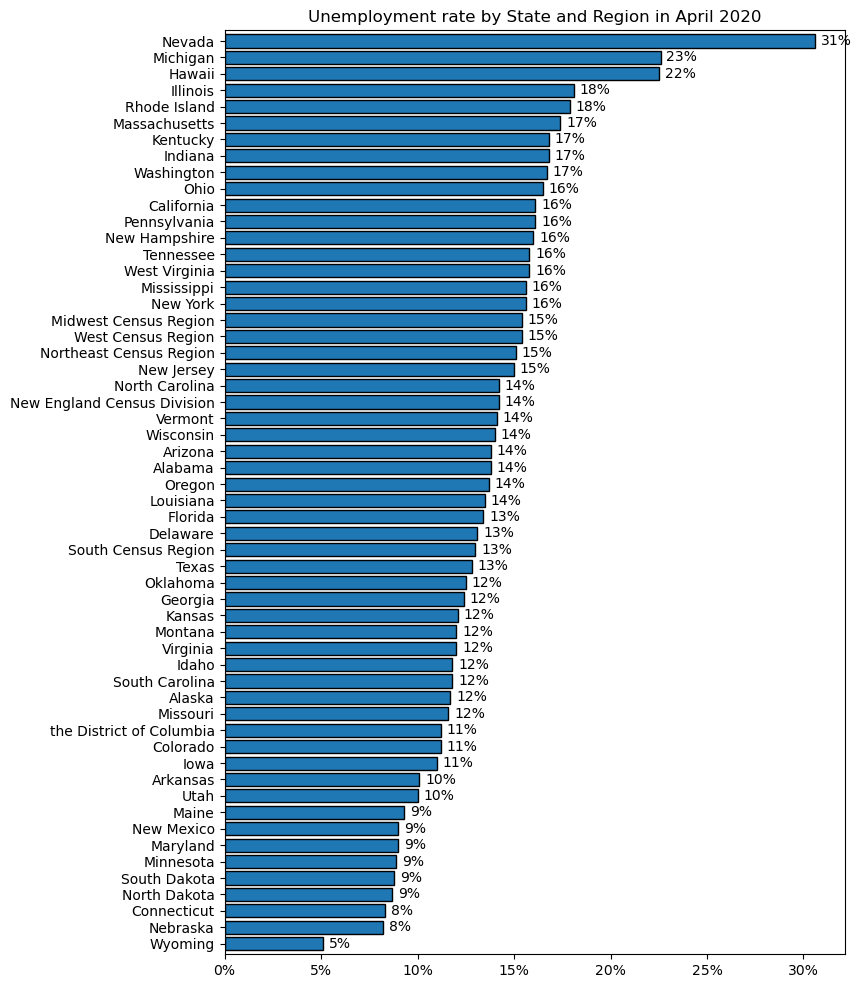

In [23]:
df_april.plot(kind='barh', width=0.8, edgecolor = 'black', figsize=(8,12))

plt.title('Unemployment rate by State and Region in April 2020')
plt.xlabel('')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'{int(x)}%'))

for index, value in enumerate(df_april['2020-04-01']):
    plt.text(value +0.3,index,f'{value:,.0f}%', va='center')

plt.legend().remove()
plt.show()

## 4. Load data of participation rate (people who are working)

In [15]:
df_participation=fred.search('participation rate state', filter=('frequency','Monthly'))
df_participation = df_participation.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [16]:
#Filter only files with State data
df_participation = df_participation.loc[df_participation.title.str.contains('Labor Force Participation Rate for')]
df_participation.head()

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2024-09-26   2024-09-26   
LBSSA01    LBSSA01     2024-09-26   2024-09-26   
LBSSA36    LBSSA36     2024-09-26   2024-09-26   
LBSSA26    LBSSA26     2024-09-26   2024-09-26   
LBSSA28    LBSSA28     2024-09-26   2024-09-26   

                                                    title observation_start  \
series id                                                                     
LBSSA06     Labor Force Participation Rate for California        1976-01-01   
LBSSA01        Labor Force Participation Rate for Alabama        1976-01-01   
LBSSA36       Labor Force Participation Rate for New York        1976-01-01   
LBSSA26       Labor Force Participation Rate for Michigan        1976-01-01   
LBSSA28    Labor Force Participation Rate for Mississippi        1976-01-01   

          observation_end frequency frequency_short    units units_short  \
series id                                                                  
LBSSA06        2024-08-01   Monthly               M  Percent           %   
LBSSA01        2024-08-01   Monthly               M  Percent           %   
LBSSA36        2024-08-01   Monthly               M  Percent           %   
LBSSA26        2024-08-01   Monthly               M  Percent           %   
LBSSA28        2024-08-01   Monthly               M  Percent           %   

           seasonal_adjustment seasonal_adjustment_short  \
series id                                                  
LBSSA06    Seasonally Adjusted                        SA   
LBSSA01    Seasonally Adjusted                        SA   
LBSSA36    Seasonally Adjusted                        SA   
LBSSA26    Seasonally Adjusted                        SA   
LBSSA28    Seasonally Adjusted                        SA   

                        last_updated popularity  \
series id                                         
LBSSA06    2024-09-20 09:01:05-05:00         21   
LBSSA01    2024-09-20 09:01:07-05:00         13   
LBSSA36    2024-09-20 09:01:03-05:00         23   
LBSSA26    2024-09-20 09:01:03-05:00         22   
LBSSA28    2024-09-20 09:01:02-05:00         21   

                                                       notes  
series id                                                     
LBSSA06    A state's labor-force participation rate is th...  
LBSSA01    A state's labor-force participation rate is th...  
LBSSA36    A state's labor-force participation rate is th...  
LBSSA26    A state's labor-force participation rate is th...  
LBSSA28    A state's labor-force participation rate is th...

In [17]:
# Transfrom id to state name
id_to_state_2 = df_participation.title.str.replace('Labor Force Participation Rate for ','').to_dict()

In [18]:
combined_file_2 =[]

for id in df_participation.index:
    results = fred.get_series(series_id=id)
    results = results.to_frame(name=id)
    combined_file_2.append(results)

participation_state = pd.concat(combined_file_2,axis=1)
participation_state

LBSSA06  LBSSA01  LBSSA36  LBSSA26  LBSSA28  LBSSA48  LBSSA12  \
1976-01-01     62.6     57.0     58.0     61.6     58.8     63.8     55.8   
1976-02-01     62.4     56.9     58.0     61.5     58.6     63.5     55.7   
1976-03-01     62.2     56.8     58.0     61.5     58.5     63.4     55.5   
1976-04-01     62.2     56.8     58.0     61.6     58.5     63.5     55.5   
1976-05-01     62.3     56.8     58.1     61.7     58.5     63.6     55.4   
...             ...      ...      ...      ...      ...      ...      ...   
2024-04-01     62.0     57.5     61.3     62.3     53.7     64.2     59.3   
2024-05-01     62.0     57.5     61.3     62.3     53.8     64.2     59.1   
2024-06-01     62.0     57.5     61.3     62.3     54.0     64.3     58.9   
2024-07-01     62.0     57.5     61.3     62.4     54.2     64.4     58.8   
2024-08-01     62.1     57.5     61.3     62.3     54.4     64.4     58.6   

            LBSSA21  LBSSA39  LBSSA55  ...  LBSSA33  LBSSA50  LBSSA09  \
1976-01-01     60.5     61.7     65.6  ...     65.9     63.6     64.2   
1976-02-01     60.3     61.7     65.5  ...     65.6     63.4     64.1   
1976-03-01     60.2     61.7     65.4  ...     65.6     63.2     64.0   
1976-04-01     60.1     61.6     65.4  ...     65.7     63.5     64.1   
1976-05-01     60.1     61.6     65.5  ...     66.0     63.6     64.3   
...             ...      ...      ...  ...      ...      ...      ...   
2024-04-01     57.1     61.8     65.6  ...     65.5     65.5     64.6   
2024-05-01     57.3     61.9     65.6  ...     65.6     65.6     64.7   
2024-06-01     57.4     62.1     65.5  ...     65.6     65.7     64.6   
2024-07-01     57.6     62.3     65.5  ...     65.6     65.7     64.4   
2024-08-01     57.7     62.3     65.5  ...     65.6     65.7     64.2   

            LBSSA38  LBSSA46  LBSSA20  LBSSA44  LBSSA11  LBSSA10  LBSSA56  
1976-01-01     62.6     64.6     65.1     63.8     64.4     62.7     65.3  
1976-02-01     62.4     64.4     65.0     63.7     64.5     62.5     64.9  
1976-03-01     62.3     64.4     64.9     63.6     64.5     62.5     64.7  
1976-04-01     62.5     64.3     65.0     63.7     64.5     62.4     64.9  
1976-05-01     62.6     64.3     65.1     63.6     64.4     62.4     65.2  
...             ...      ...      ...      ...      ...      ...      ...  
2024-04-01     69.0     67.6     66.1     64.7     72.8     60.1     63.0  
2024-05-01     68.9     67.5     66.1     64.9     72.7     59.9     62.9  
2024-06-01     68.9     67.5     66.1     65.1     72.6     59.8     63.0  
2024-07-01     68.9     67.5     66.1     65.2     72.5     59.8     63.1  
2024-08-01     68.8     67.5     66.2     65.2     72.3     59.6     63.1  

[584 rows x 51 columns]

In [19]:
participation_state.columns = [id_to_state_2[x] for x in participation_state.columns]
participation_state.columns


Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object')

## Plot Unemployment VS Paricipation Rate from 2020

In [20]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

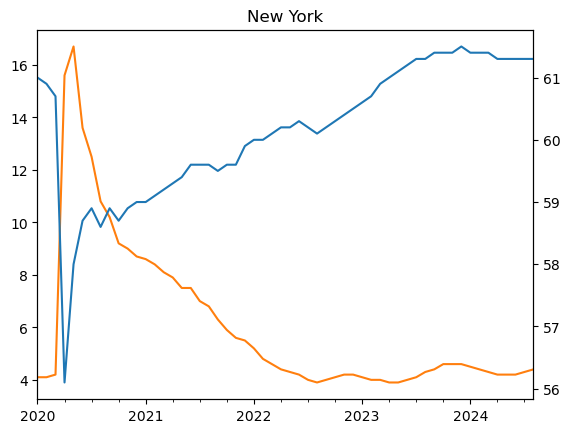

In [31]:
# Example plot for New York's data
fig, ax = plt.subplots()
ax2 = ax.twinx()  # create a 2nd axis
unemp_state.query('index >= 2020')['New York'].plot(ax=ax, label = 'Unemployment', color = color_pal[1])
participation_state.query('index >= 2020')['New York'].plot(ax=ax2, label = 'Participation')
ax.set_title('New York')
plt.show()


In [32]:
print(participation_state.columns,1)
print(unemp_state.columns)

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island',
       'District Of Columbia', 'Delaware', 'Wyoming'],
      dtype='object') 1
Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South

In [21]:
# Rename the column name of 'the District of Columbia' in unemp_state
unemp_state = unemp_state.rename(columns={'the District of Columbia':'District Of Columbia'})

### Top states with the highest participation rate from 2020 to 2024

In [29]:
part_2020_df = participation_state.query('index > 2020').copy()
part_2020_df.loc['AVG'] = part_2020_df.mean()
sorted_part_2020 = part_2020_df.loc['AVG'].sort_values(ascending=False).index

In [36]:
# Sort the dataframe
part_2020_df = part_2020_df[sorted_part_2020]
# Drop the AVG row
part_2020_df = part_2020_df.drop('AVG')

In [47]:
# Identify top states with highest participation rate
top_states = 6
top_states_name = part_2020_df.iloc[:, :top_states].columns
top_states_name

Index(['District Of Columbia', 'Nebraska', 'North Dakota', 'Utah',
       'South Dakota', 'Minnesota'],
      dtype='object')

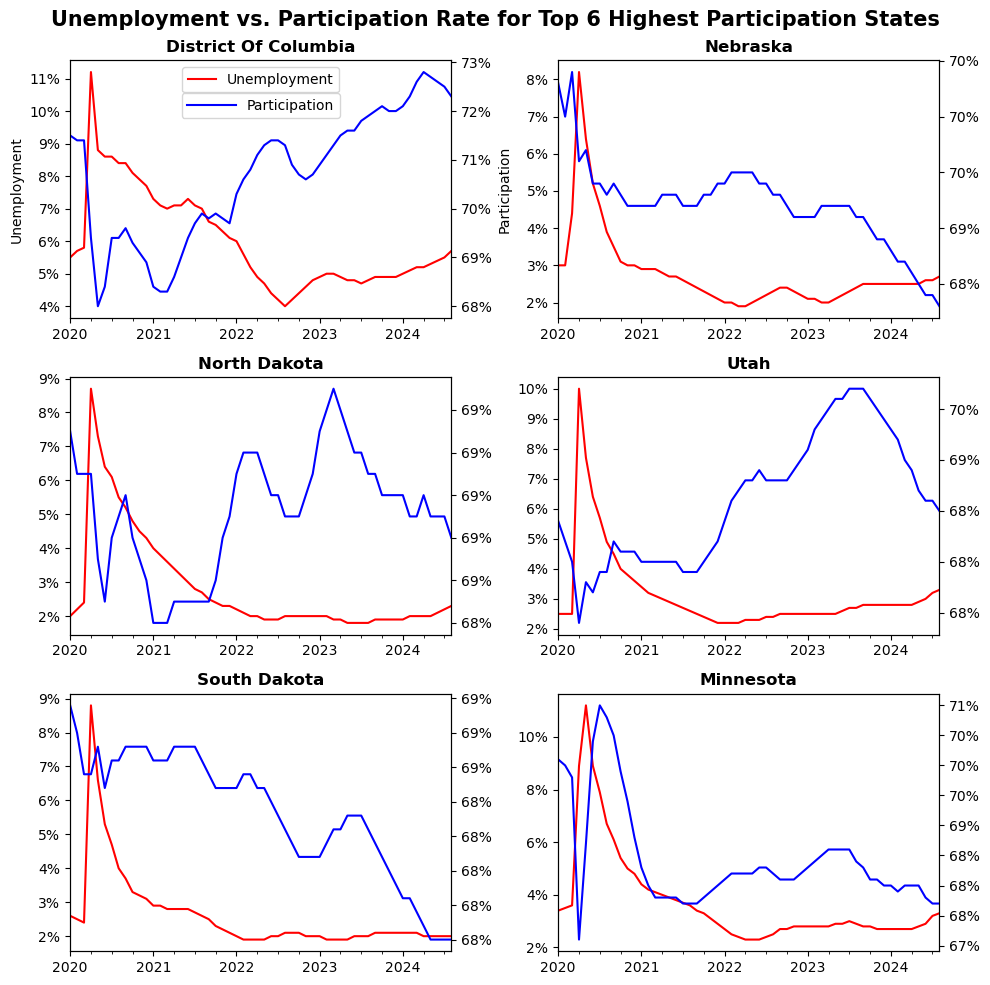

In [98]:
# Plot data of top 6 states with highest participation rate 

fig, axs = plt.subplots(3,2, figsize=(10, 10)) 
axs = axs.flatten()

for i, state in enumerate(top_states_name):
    if state not in unemp_state.columns:
        continue
    ax = axs[i] 
    ax2 = ax.twinx()
    
    # Plot Unemployment on the first y-axis
    unemp_state.query('index >= 2020')[state].plot(ax=ax, label='Unemployment', color='red')
    
    # Plot Participation on the secondary y-axis
    participation_state.query('index >= 2020')[state].plot(ax=ax2, label='Participation', color='blue')

    if i ==0:
        # Position the unemployment legend at the top center
        ax.legend(loc='upper center')
        # Position the participation legend below the unemployment legend
        ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9), ncol=1, handlelength=3.5)
        ax.set_ylabel('Unemployment')
        ax2.set_ylabel('Participation')

    ax.set_title(state, fontweight='bold')
    
    from matplotlib.ticker import PercentFormatter
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
    ax2.yaxis.set_major_formatter(PercentFormatter(decimals=0))

fig.suptitle(f'Unemployment vs. Participation Rate for Top {top_states} Highest Participation States', fontweight='bold', fontsize=15)
fig.tight_layout()

plt.show()

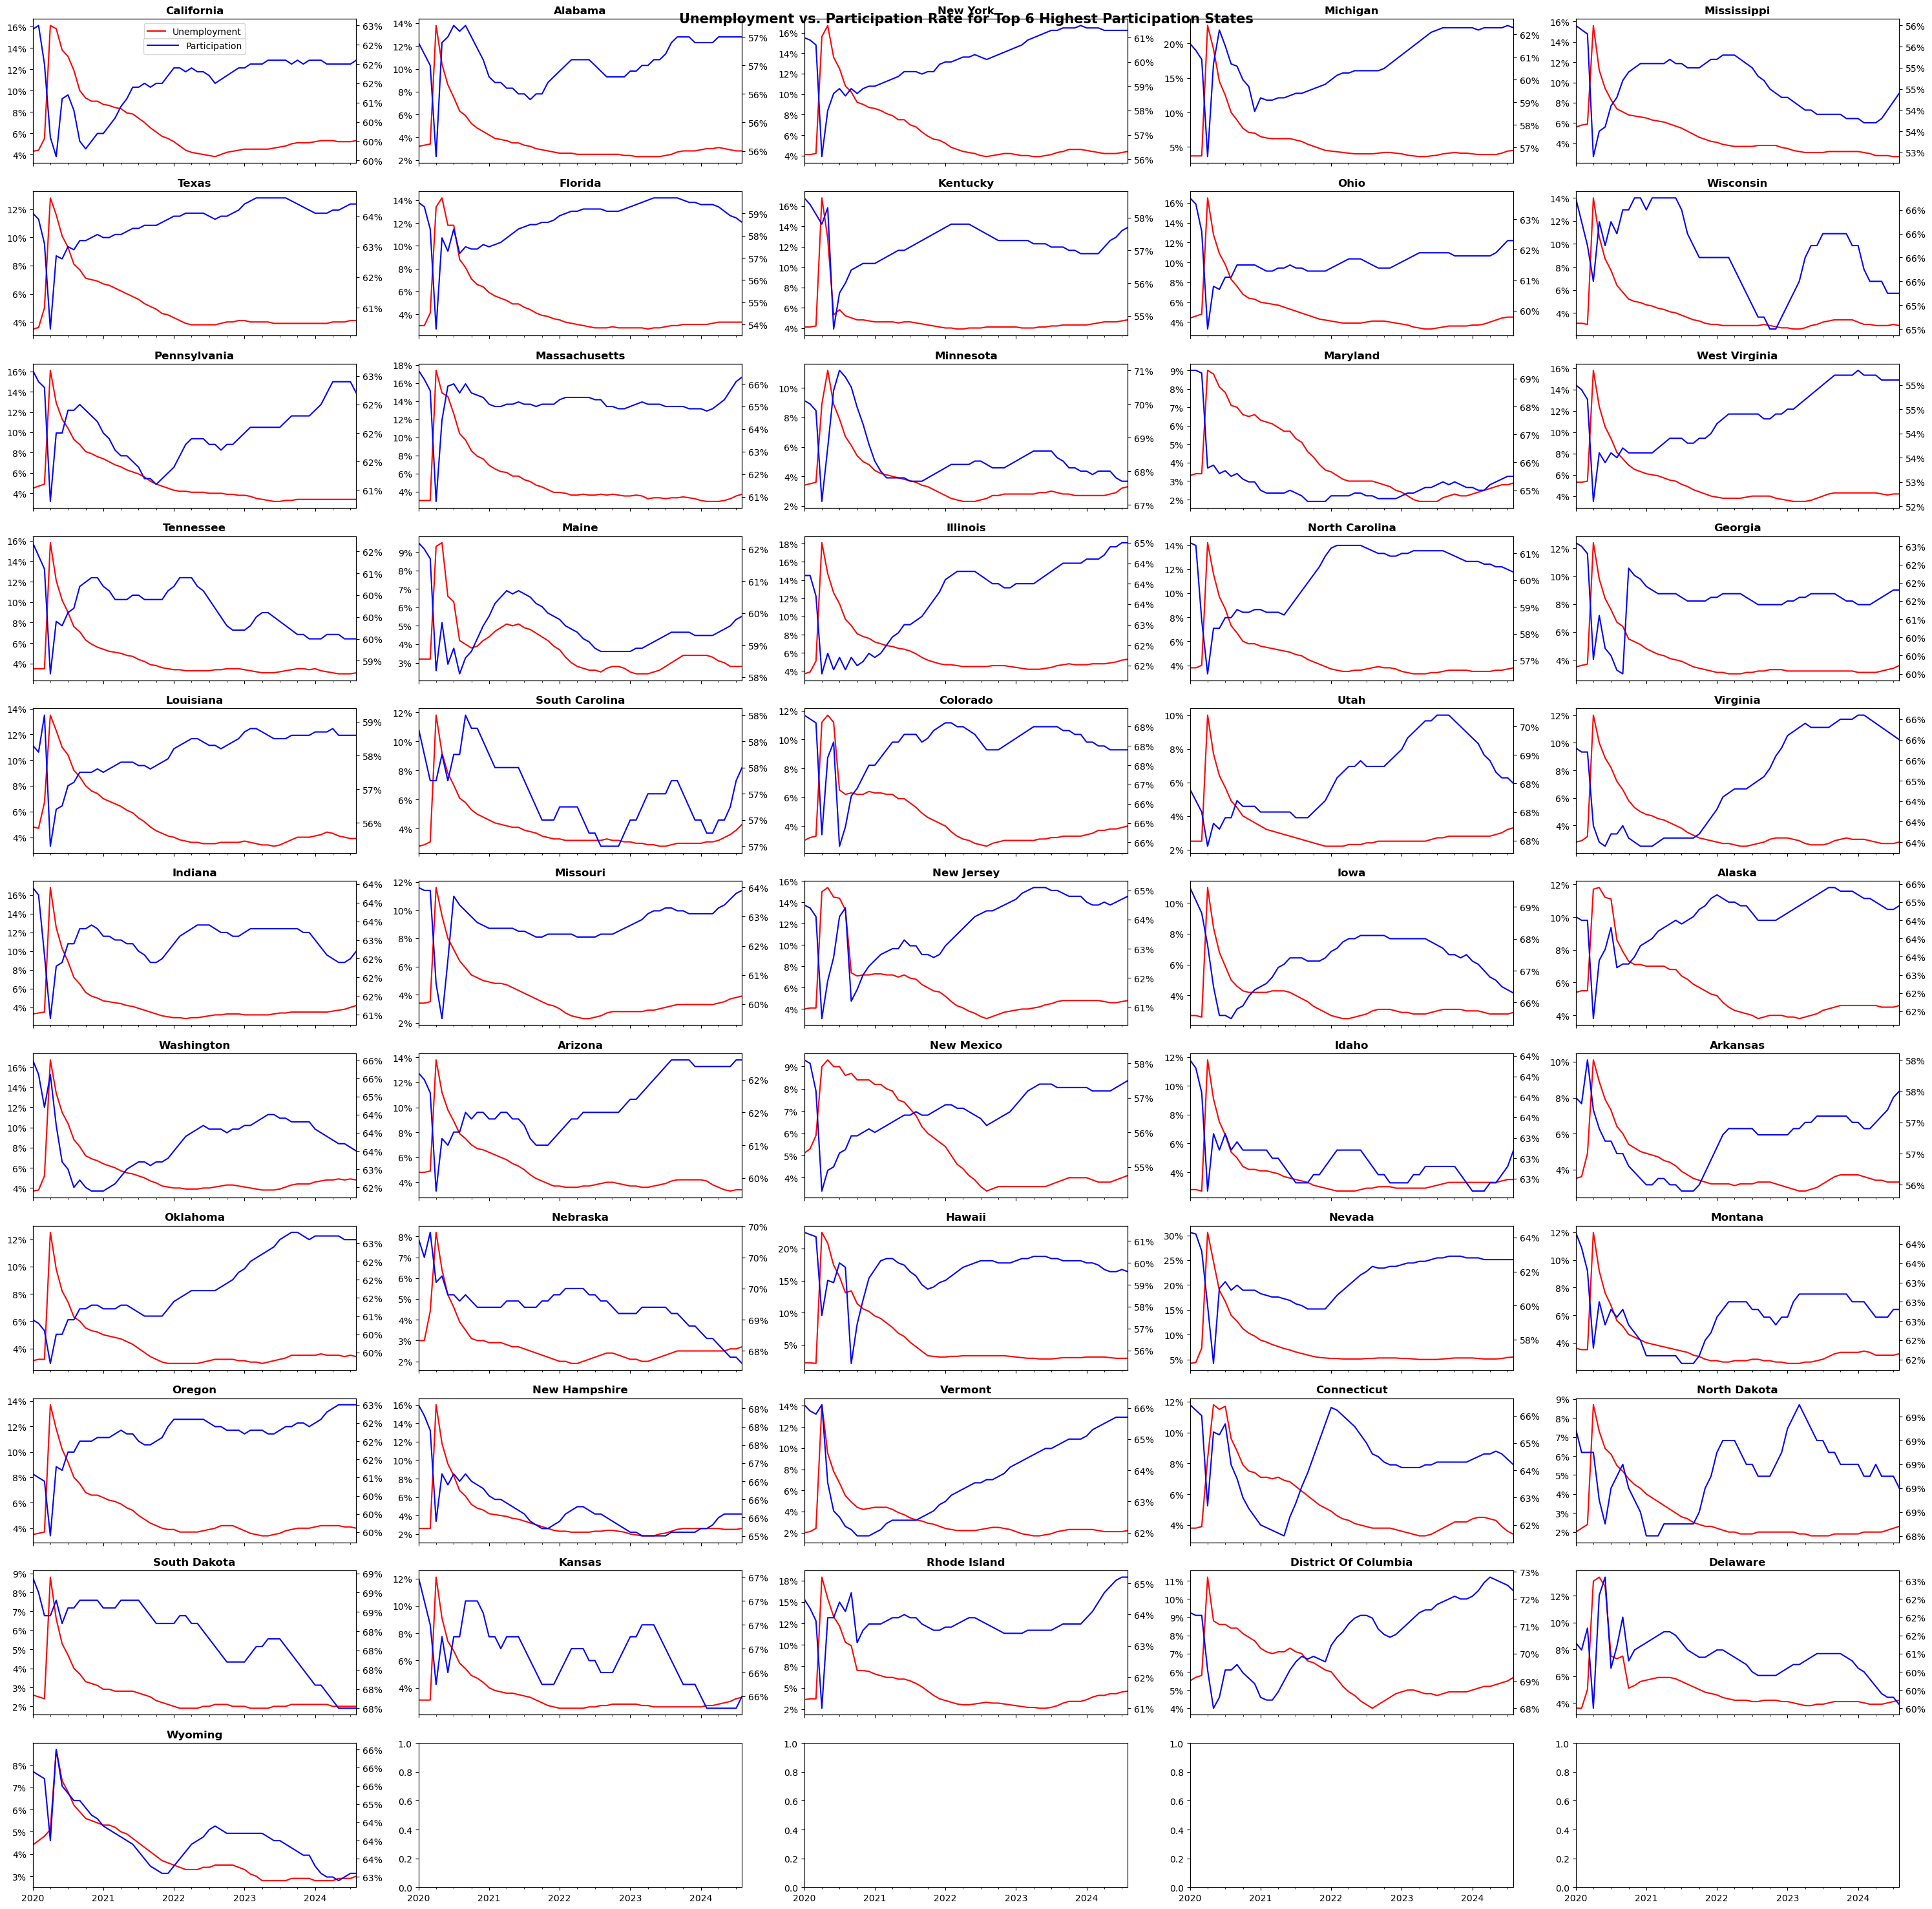

In [100]:
# Plot data of all sates 

fig, axs = plt.subplots(11, 5, figsize=(30, 30), sharex=True) 
axs = axs.flatten()

for i, state in enumerate(participation_state.columns):
    if state not in unemp_state.columns:
        print(f"Skipping {state} as it's not found in unemployment data.")
        continue
    ax = axs[i]  
    ax2 = ax.twinx()  
    
    unemp_state.query('index >= 2020')[state].plot(ax=ax, label='Unemployment', color='red')
    
    participation_state.query('index >= 2020')[state].plot(ax=ax2, label='Participation', color='blue')

    ax.set_title(state, fontweight='bold')

    if i ==0:
        ax.legend(loc='upper center')
        ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 0.9), ncol=1, handlelength=3.5)

    from matplotlib.ticker import PercentFormatter
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
    ax2.yaxis.set_major_formatter(PercentFormatter(decimals=0))

fig.suptitle(f'Unemployment vs. Participation Rate for Top {top_states} Highest Participation States', fontweight='bold', fontsize=15)
fig.tight_layout()

plt.show()